<a href="https://colab.research.google.com/github/LuisMig-code/Analise-de-RH-mudanca-de-cargo-dos-cientistas-de-dados/blob/main/HR_analysis_change_of_position_of_data_scientists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HR Analysis - Change of position of data scientists on Linkedin

<img src="https://cdn.pixabay.com/photo/2020/01/21/17/17/hr-process-4783430_960_720.png" width=850>

In [42]:
# importando os pacotes necessários

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

link to the kaggle data page [here](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists).

## Context:

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

In [43]:
# importando os dados
df = pd.read_csv("https://raw.githubusercontent.com/LuisMig-code/Analise-de-RH-mudanca-de-cargo-dos-cientistas-de-dados/main/aug_train.csv")
df_sub = pd.read_csv("https://raw.githubusercontent.com/LuisMig-code/Analise-de-RH-mudanca-de-cargo-dos-cientistas-de-dados/main/aug_test.csv")

In [44]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [45]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

For the purposes of understanding, I will leave here a kind of dictionary of the variables, with their names and what they mean:

- **enrollee_id** : Unique ID for candidate

- **city**: City code

- **city_ development _index** : Developement index of the city (scaled)

- **gender**: Gender of candidate

- **relevent_experience**: Relevant experience of candidate

- **enrolled_university**: Type of University course enrolled if any

- **education_level**: Education level of candidate

- **major_discipline** :Education major discipline of candidate

- **experience**: Candidate total experience in years

- **company_size**: No of employees in current employer's company

- **company_type** : Type of current employer

- **lastnewjob**: Difference in years between previous job and current job

- **training_hours**: training hours completed

- **target**: 0 – Not looking for job change, 1 – Looking for a job change

## Pre-processing of data :

Removing null data from the "**gender**" category

In [46]:
df.dropna(subset = ["gender"], inplace=True)
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In our analysis we will start from the assumption that the registered individuals left some empty fields by choice (with the exception of the "gender" field), for this we will **assign a value to the missing data**.

In [47]:
# preenchendo os campos vazios por uma string
df = df.fillna("did_not_answer")

The "**city**" field returns us an identifier of the user's city, however it is in "str" format, this is in text format, we want it to be numeric.

In [48]:
df.city = (df.city.str.replace("city_","")).astype(int)

Let's check out some general information from our dataset with the info attribute:

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14650 entries, 0 to 19156
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             14650 non-null  int64  
 1   city                    14650 non-null  int64  
 2   city_development_index  14650 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     14650 non-null  object 
 5   enrolled_university     14650 non-null  object 
 6   education_level         14650 non-null  object 
 7   major_discipline        14650 non-null  object 
 8   experience              14650 non-null  object 
 9   company_size            14650 non-null  object 
 10  company_type            14650 non-null  object 
 11  last_new_job            14650 non-null  object 
 12  training_hours          14650 non-null  int64  
 13  target                  14650 non-null  float64
dtypes: float64(2), int64(3), object(9)
mem

Note that many columns have "dtype" as "object", in order to improve the performance of our * dataset * and make it less disk memory, let's change this "dtype" to "category" which is what these variables represent:

In [50]:
df.gender = df.gender.astype('category') 
df.relevent_experience = df.relevent_experience.astype('category') 
df.enrolled_university = df.enrolled_university.astype('category') 
df.education_level = df.education_level.astype('category') 
df.major_discipline = df.major_discipline.astype('category') 
df.experience = df.experience.astype('category') 
df.company_size = df.company_size.astype('category') 
df.company_type = df.company_type.astype('category') 
df.last_new_job = df.last_new_job.astype('category') 

Now our dataset is better optimized

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14650 entries, 0 to 19156
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             14650 non-null  int64   
 1   city                    14650 non-null  int64   
 2   city_development_index  14650 non-null  float64 
 3   gender                  14650 non-null  category
 4   relevent_experience     14650 non-null  category
 5   enrolled_university     14650 non-null  category
 6   education_level         14650 non-null  category
 7   major_discipline        14650 non-null  category
 8   experience              14650 non-null  category
 9   company_size            14650 non-null  category
 10  company_type            14650 non-null  category
 11  last_new_job            14650 non-null  category
 12  training_hours          14650 non-null  int64   
 13  target                  14650 non-null  float64 
dtypes: category(9), float6

We can see that we have more data of value 0 than data of value 1, this will cause us problems when creating our model, but we will find a way around this issue.

As much of our data is in the form of a string (str), that is, in the form of text, we will first change the data in our columns to numeric values, assigning values to them.

## Assigning numerical values to our data

In [52]:
# gender
mapa = {
    'Male':1,
    'Female':2,
    'Other':3
}
df.gender = df.gender.map(mapa).astype(int)

In [53]:
# relevent_experience
mapa = {
    'Has relevent experience':1,
    'No relevent experience':2
}
df.relevent_experience = df.relevent_experience.map(mapa).astype(int)

In [54]:
# enrolled_university
mapa = {
    'did_not_answer': 0,
    'no_enrollment':1,
    'Part time course':2,
    'Full time course':3
}
df.enrolled_university = df.enrolled_university.map(mapa).astype(int)

In [55]:
# education_level
mapa = {
    'did_not_answer':0,
    'Primary School':1,
    'High School' : 2,
    'Graduate' : 3,
    'Masters':4,
    'Phd':5
}
df.education_level = df.education_level.map(mapa).astype(int)

In [56]:
# major_discipline
mapa = {
    'did_not_answer':0,
    'STEM':1,
    'Arts':2,
    'Humanities':3,
    'Business Degree':4,
    'No Major' : 5,
    'Other': 6
}

df.major_discipline = df.major_discipline.map(mapa).astype(int)

In [57]:
# experience

## removendo valores STR 
df.experience = (df.experience.str.replace(">",''))
df.experience = (df.experience.str.replace("<",''))
df.experience = (df.experience.str.replace("did_not_answer",'0'))

## mudando o tipo de STR para INT
df.experience = df.experience.astype(int).astype(int)

In [58]:
# company_size
mapa = {
    'did_not_answer':0,
    '50-99' : 1,
    '<10' : 1,
    '10/49' : 1,

    '100-500':2,
    '500-999':2,

    '1000-4999':3,
    '5000-9999':3,
    '10000+':3
}

df.company_size = df.company_size.map(mapa).astype(int)

In [59]:
# company_type
mapa = {
    'did_not_answer':0,
    'Pvt Ltd':1,
    'Funded Startup' : 2,
    'Early Stage Startup' : 3,
    'Other' : 4,
    'Public Sector' : 5,
    'NGO':6
}
df.company_type = df.company_type.map(mapa).astype(int)

In [60]:
# last_new_job
mapa = {
    'did_not_answer' : 0,
    '1':1,
    '2':2,
    '3':3,
    '4':4,
    '>4':5,
    'never':6
}

df.last_new_job = df.last_new_job.map(mapa).astype(int)

In [61]:
# final result:
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,1,1,1,3,1,20,0,0,1,36,1.0
1,29725,40,0.776,1,2,1,3,1,15,1,1,5,47,0.0
4,666,162,0.767,1,1,1,4,1,20,1,2,4,8,0.0
6,28806,160,0.920,1,1,1,2,0,5,1,2,1,24,0.0
7,402,46,0.762,1,1,1,3,1,13,1,1,5,18,1.0


## Exploratory Analysis

Done assigning the values, let's start some graphical analysis

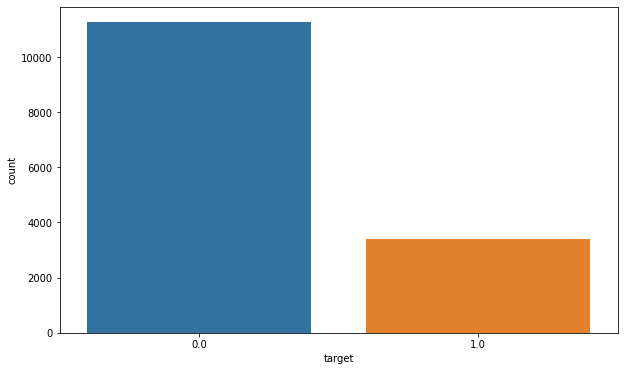

In [62]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=df.target)

We can already see that we have unbalanced classes in our data, that is, more values 0's than 1's. This will cause problems in the predictions of our model, but we will work around it.

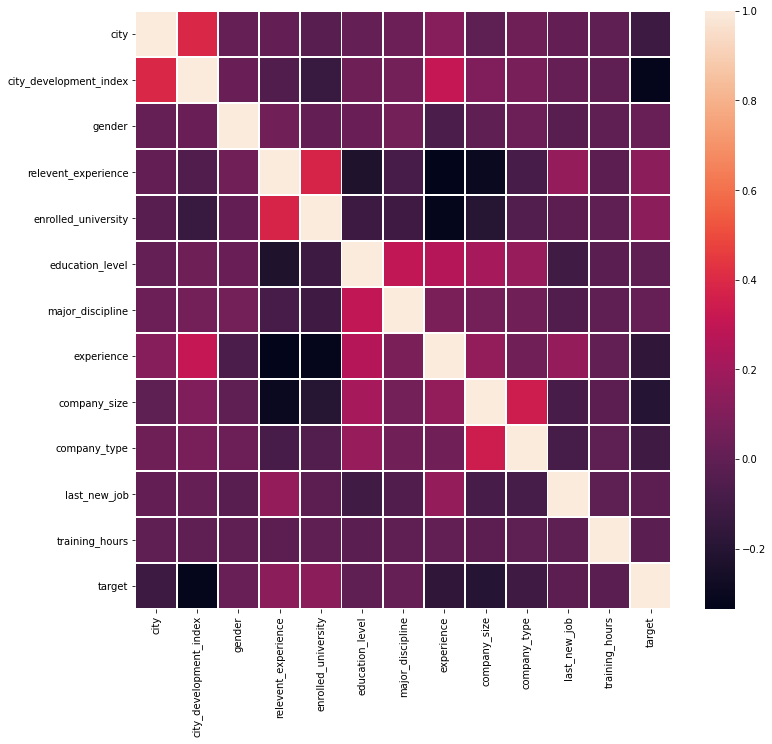

In [63]:
# plotando o heatmap
fig, ax = plt.subplots(figsize=(12,11))
sns.heatmap(df.drop('enrollee_id', axis=1).corr(), ax=ax , linewidths=.9)
plt.show()

many of our variables, when related to the "target" variable, have negative correlations, that is, they are inversely proportional.

## Machine Learning:





---




### First try:

In [64]:
# fazendo import das bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

In [65]:
# definindo as varáveis X e Y:
X = df.drop(['enrollee_id','city','target'] , axis=1)
y = df['target']

In [66]:
# Divisão dos dados:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3,stratify = y,shuffle=True,random_state=28)

In [67]:
# instanciando o modelo
modelo = RandomForestClassifier(random_state=28)

# treinando o modelo
modelo.fit(X_treino,y_treino)

# fazendo previsões com o modelo
previsoes = modelo.predict(X_teste)

# medindo a acurácia do modelo
acuracia = accuracy_score(y_teste,previsoes)

print("A acurácia foi de: ",acuracia)
print(classification_report(y_teste,previsoes))

A acurácia foi de:  0.7915813424345848
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      3379
         1.0       0.56      0.44      0.49      1016

    accuracy                           0.79      4395
   macro avg       0.70      0.67      0.68      4395
weighted avg       0.78      0.79      0.78      4395



We can see that we obtained an accuracy rate that was quite good, 79%, but are we going to analyze the report of our model better?

As we saw earlier, we have unbalanced data, that is, we have more data with a value of 0 than a value of 1. This means that there is a high chance that we have created a model that classifies the values 0 well, as there is more data to be used in the training, while the value 1 there are few to be "studied".

In the end, we created a model that doesn't generalize the data well, but what do these metrics *precision*, *recall* and *f1-score* mean about our data?

They were responsible for bringing me to that conclusion.

**Precision**: The * precision * refers to the hit rate of one value. Like this? let's say we have 100 values ​​that were classified as 1 and our models classified 98 of them correctly, so the model's precision for value 1 would be 98%, because of the 100 possible values ​​of classification '1', the model got 98 of them correct. It literally measures the accuracy of the model to just 1 rating, not the overall rating, this is called accuracy.

**Recall**: The * recall * measures the overall hit rate, using only the correct ratings. Like this? simple:

positive_value_values ​​/ (positive_value_values ​​+ negative_value_values)

Basically the amount I rated 1, divided by my total hits

**F1-Score**: The * f1-score * is simply the weighted average between * recall * and * precision *.

<br>

I hope that it has become clear the functionality and the way to be calculated for each evaluation parameter

**But, after all, how to get around this problem?**

### **Dealing with unbalanced classes**:

We saw that we have a problem of unbalanced classes, right? let's go to the solution:

In a nutshell, and kind of obvious, what we need to do is balance these classes. We can do this in two ways: <br>

1) **Decreasing our data** (Undersampling): In this case, we will balance our training data so that they have equal classes, it consists of randomly reducing the examples of the majority class.
- **Problems**: As we decrease our data we will have less training data in general, which can result in a model that does not generalize as well, decreasing accuracy; <br>
<br>

2) **Increasing our data** (Oversampling): In this case we are going to balance our data by increasing the values ​​(target variable) we have in less quantity with those we have in greater quantity and artificial form.
- **Problems**: Depending on the quantity, we may have models that make the training data correct, but when applied to the test data, they do not do so well, as they only learned to correct the training data.

<img src="https://miro.medium.com/max/1450/0*_67X5Zch6SOARORh.png">

In our case I will use both algorithms and see which one works best.

#### **Oversampling**:

Generation of synthetic data with the SMOTE algorithm (Synthetic Minority Over-sampling Technique)

In [68]:
# resgatandos os valores de X e y:
X = df.drop(['enrollee_id','city','target'] , axis=1)
y = df['target']

In [69]:
# importando o SMOTE:
from imblearn.over_sampling import SMOTE

In [70]:
# instanciando o SMOTE:
smote = SMOTE()

In [71]:
# aplicando o SMOTE aos nossos dados ("treinando"):
X , y = smote.fit_sample(X , y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


For each possible classification we have 11262.0 data


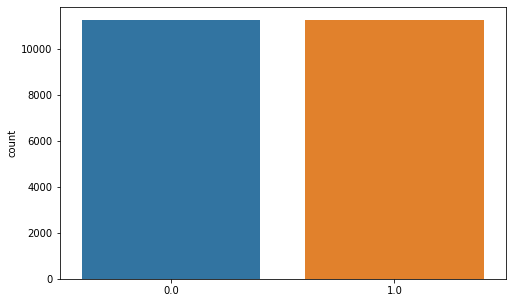

In [72]:
# checking the proportion of our target variable data:
plt.figure(figsize=(8,5))
ax = sns.countplot(x=y)
print("For each possible classification we have {} data".format(y.shape[0] / 2))

notice that we created synthetic data for the values classified as 1 in order to have equal quantities, now we just have to create the model and train to know how it does.

In [73]:
# Divisão dos dados:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3,stratify = y,shuffle=True,random_state=28)

In [74]:
# instanciando o modelo
modelo = RandomForestClassifier(random_state=28)

# treinando o modelo
modelo.fit(X_treino,y_treino)

# fazendo previsões com o modelo
previsoes = modelo.predict(X_teste)

# medindo a acurácia do modelo
acuracia = accuracy_score(y_teste,previsoes)

print("A acurácia foi de: ",acuracia)
print(classification_report(y_teste,previsoes))

A acurácia foi de:  0.8603137022787807
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      3379
         1.0       0.87      0.84      0.86      3379

    accuracy                           0.86      6758
   macro avg       0.86      0.86      0.86      6758
weighted avg       0.86      0.86      0.86      6758



This time we had both greater accuracy, as we improved our ***precision*** and ***recall*** values, with an overall accuracy rate of ** 85% ** of accuracy.

#### **Undersampling** :

In this case we will decrease the majority data with the NearMiss algorithm

In [75]:
# resgatandos os valores de X e y:
X = df.drop(['enrollee_id','city','target'] , axis=1)
y = df['target']

In [76]:
# Importando o NearMiss
from imblearn.under_sampling import NearMiss

In [77]:
# instanciando o NearMiss
nm = NearMiss()

In [78]:
# Aplicando o Near Miss aos nossos dados:
X , y = nm.fit_sample(X , y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


For each possible classification we have 3388.0 data


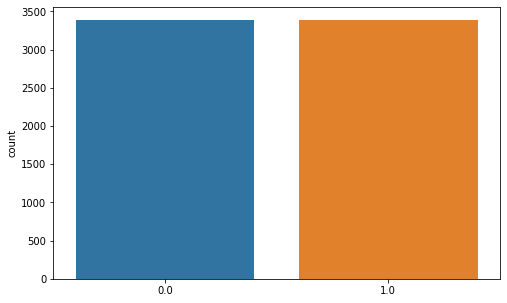

In [79]:
# checking the proportion of our target variable data:
plt.figure(figsize=(8,5))
ax = sns.countplot(x=y)
print("For each possible classification we have {} data".format(y.shape[0] / 2))

In this case, we reduced our data classified as 0 in order to be equal to those classified as 1.

In [80]:
# Divisão dos dados:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3,stratify = y,shuffle=True,random_state=28)

In [81]:
# instanciando o modelo
modelo = RandomForestClassifier(random_state=28)

# treinando o modelo
modelo.fit(X_treino,y_treino)

# fazendo previsões com o modelo
previsoes = modelo.predict(X_teste)

# medindo a acurácia do modelo
acuracia = accuracy_score(y_teste,previsoes)

print("A acurácia foi de: ",acuracia)
print(classification_report(y_teste,previsoes))

A acurácia foi de:  0.763895720609936
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.77      1016
         1.0       0.77      0.75      0.76      1017

    accuracy                           0.76      2033
   macro avg       0.76      0.76      0.76      2033
weighted avg       0.76      0.76      0.76      2033



Now we can see that our accuracy was lower when compared to SMOTE, but we obtained better values for ***recall*** and ***precision*** when compared to the model without any Oversampling or Undersampling algorithm.

## Conclusions

For our analysis we were able to know today how to deal when we have unbalanced classes using both **SMOTE** (for Oversampling) and **NearMiss** (for Undersampling), as well as their functionality and the problems they can cause for our Machine Learning model.


We concluded that for our data, it was best to use **SMOTE**.

Of course, both SMOTE and NearMiss receive parameters that can help improve the efficiency of the model, but I prefer to leave that to your discretion, you can ***tunning*** your way.

Thanks for accessing this Google Colab notebook, please consider accessing more of my articles:

[LinkedIn](www.linkedin.com/in/luis-miguel-code) <br>
[GitHub](https://github.com/LuisMig-code/Portifolio) <br>
[Medium](https://luis-miguel-code.medium.com/) 